# <center><h3>Importing Libraries</h3></center>

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# <center><h3>Importing Data & ETL</h3></center>

In [2]:
df = pd.read_csv('Source/Heart_Disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

###### Understanding Data

In [3]:
# age
# sex
# cp: Refers to chest pain type. It's categorized into four types: 0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic
# trestbps: Denotes the resting blood pressure (in mm Hg) of the patient upon admission to the hospital.
# chol: Stands for serum cholesterol level (in mg/dl).
# fbs: Represents the fasting blood sugar level (> 120 mg/dl is considered as 1 and <= 120 mg/dl is considered as 0).
# restecg: Refers to resting electrocardiographic results. It categorizes into three types: 0: Normal 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach: Represents the maximum heart rate achieved.
# exang: Indicates exercise-induced angina (1 = yes, 0 = no).
# oldpeak: Refers to the ST depression induced by exercise relative to rest.
# slope: Denotes the slope of the peak exercise ST segment. It's categorized into three types: 0: Upsloping 1: Flat 2: Downsloping
# ca: Represents the number of major vessels (0-3) colored by fluoroscopy.
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect: Refers to a blood disorder called thalassemia. It's categorized into three types: 1: Normal 2: Fixed defect 3: Reversible defect
# target: Indicates whether the patient has heart disease or not (1 = presence, 0 = absence).

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [9]:
thal={0: 'Normal', 1: 'Fixed defect', 2:'Reversable Defect', 3:'Thalassemia'}
ca={0:'Zero', 1:'One', 2:'Two', 3:'Three', 4:'Four'}
cp={0: 'Typical angina', 1: 'Atypical angina', 2: 'Non-anginal pain', 3: 'Asymptomatic'}
target={0: 'Absent', 1: 'Present'}
exang={0: 'No', 1: 'Yes'}
slope={0:'Upsloping',1:'Flat',2:'Downsloping'}
restecg={0: 'Normal', 1: 'ST-T wave abnormality', 2:'Left ventricular hypertrophy'}

# <center><h3>EDA & Visualization</h3></center>

In [10]:
pie_sex = df[['sex']].value_counts().reset_index()
px.pie(pie_sex, values='count',
       names={0: 'Female', 1: 'Male'},
       hole=0.5,
       title='Sex Distribution of Patients').update_layout(title_x=0.5)

In [11]:
# Majority of patients are female.

In [12]:
age_plot = df['age'].value_counts().reset_index()
age_plot = age_plot.sort_values(by='count',ascending=False)
label = {'age':'Age', 'count':'patients'}
px.histogram(age_plot,
             x='age',
             y='count',
             marginal='violin',
             title='Age Distribution of Patients',
             labels=label).update_layout(title_x=0.5)

In [13]:
# Majority of patients belong to the age group of 50-60 years.

In [14]:
cp_type = df['cp'].value_counts().reset_index()
px.pie(cp_type,
       values='count',
       hole=0.5,
       names={0: 'Typical angina', 1: 'Atypical angina', 2: 'Non-anginal pain', 3: 'Asymptomatic'},
       title='Chest Pain Distribution of Patients').update_layout(title_x=0.5)

In [15]:
# Majority of patients have Typical angina.

In [16]:
bp_plot = df['trestbps'].value_counts().reset_index()
bp_plot = bp_plot.sort_values(by='count',ascending=False)
label = {'trestbps':'Resting Blood Pressure (mm Hg)', 'count':'patients'}
px.histogram(bp_plot,
             x='trestbps',
             y='count',
             marginal='violin',
             title='Blood Pressure Distribution of Patients',
             labels=label).update_layout(title_x=0.5)

In [17]:
# Resting blood pressure commonly ranges between 120 to 140.

In [18]:
sc_plot = df['chol'].value_counts().reset_index()
sc_plot = sc_plot.sort_values(by='count',ascending=False)
label = {'chol':'Serum Cholesterol (mg/dl)', 'count':'patients'}
px.histogram(sc_plot,
             x='chol',
             y='count',
             marginal='violin',
             title='Serum Cholesterol Distribution of Patients',
             labels=label).update_layout(title_x=0.5)

In [19]:
# Cholesterol sommonly ranges between 200 to 300 mg/dl

In [20]:
fbs_type = df['fbs'].value_counts().reset_index()
px.pie(fbs_type,
       values='count',
       names={0: '<=120', 1: '>120'},
       hole=0.5,
       title='Fasting Blood Sugar Level Distribution of Patients').update_layout(title_x=0.5)

In [21]:
# Fasting blood sugar level less than 120 mg/dl is more common

In [22]:
restecg_type = df['restecg'].value_counts().reset_index()
px.pie(restecg_type,
       values='count',
       names=restecg,
       hole=0.5,
       title='Rest ECG Distribution of Patients').update_layout(title_x=0.5)

In [23]:
# Left ventricular hypertrophy is least common

In [24]:
thalach_plot = df['thalach'].value_counts().reset_index()
thalach_plot = thalach_plot.sort_values(by='count',ascending=False)
label = {'thalach':'Maximum Heart Rate', 'count':'patients'}
px.histogram(thalach_plot,
             x='thalach',
             y='count',
             marginal='violin',
             title='Maximum Heart Rate Distribution of Patients',
             labels=label).update_layout(title_x=0.5)

In [25]:
# Peak heart rate most commonly ranges between 140 to 180

In [26]:
ca_plot = df['ca'].value_counts().reset_index()
ca_plot = ca_plot.sort_values(by='count',ascending=False)
label = {'ca':'Number of Major Vessels', 'count':'Total Number of Patients'}
px.bar(ca_plot,
       x='ca',
       y='count',
       title='Distribution of Total Major Blood Vessels Colored in Fluoroscopy',
       labels=label).update_layout(title_x=0.5)

In [27]:
# Most patients dont have any major vessels colored in fluoroscopy

In [28]:
thal_type = df['thal'].value_counts().reset_index()
px.pie(thal_type,
       values='count',
       names=thal,
       hole=0.5,
       title='Disorder Distribution of Patients').update_layout(title_x=0.5)

In [29]:
# Fixed defect is most prominent although most patients dont have any defects

<Axes: title={'center': 'Correlation Map of Medical Attributes'}>

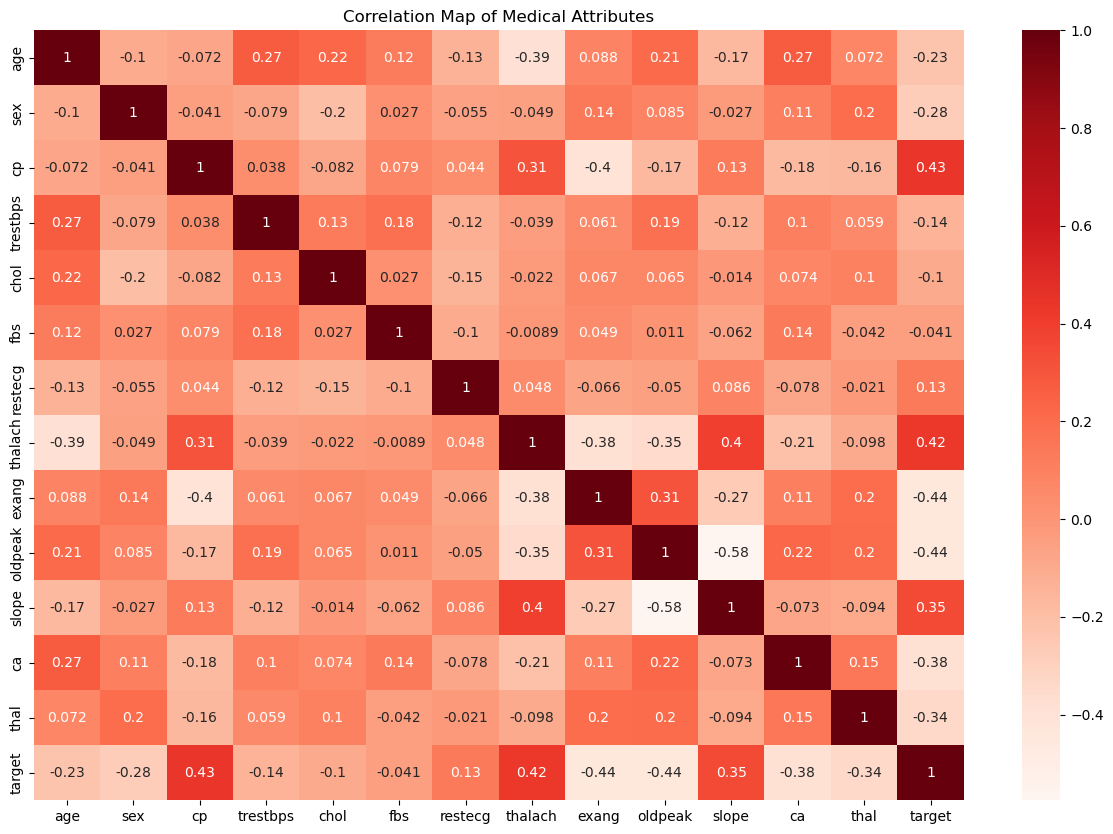

In [30]:
df_corr = df.corr()
plt.figure(figsize=(15,10))
plt.title('Correlation Map of Medical Attributes')
sns.heatmap(data=df_corr, annot=True, cmap='Reds')

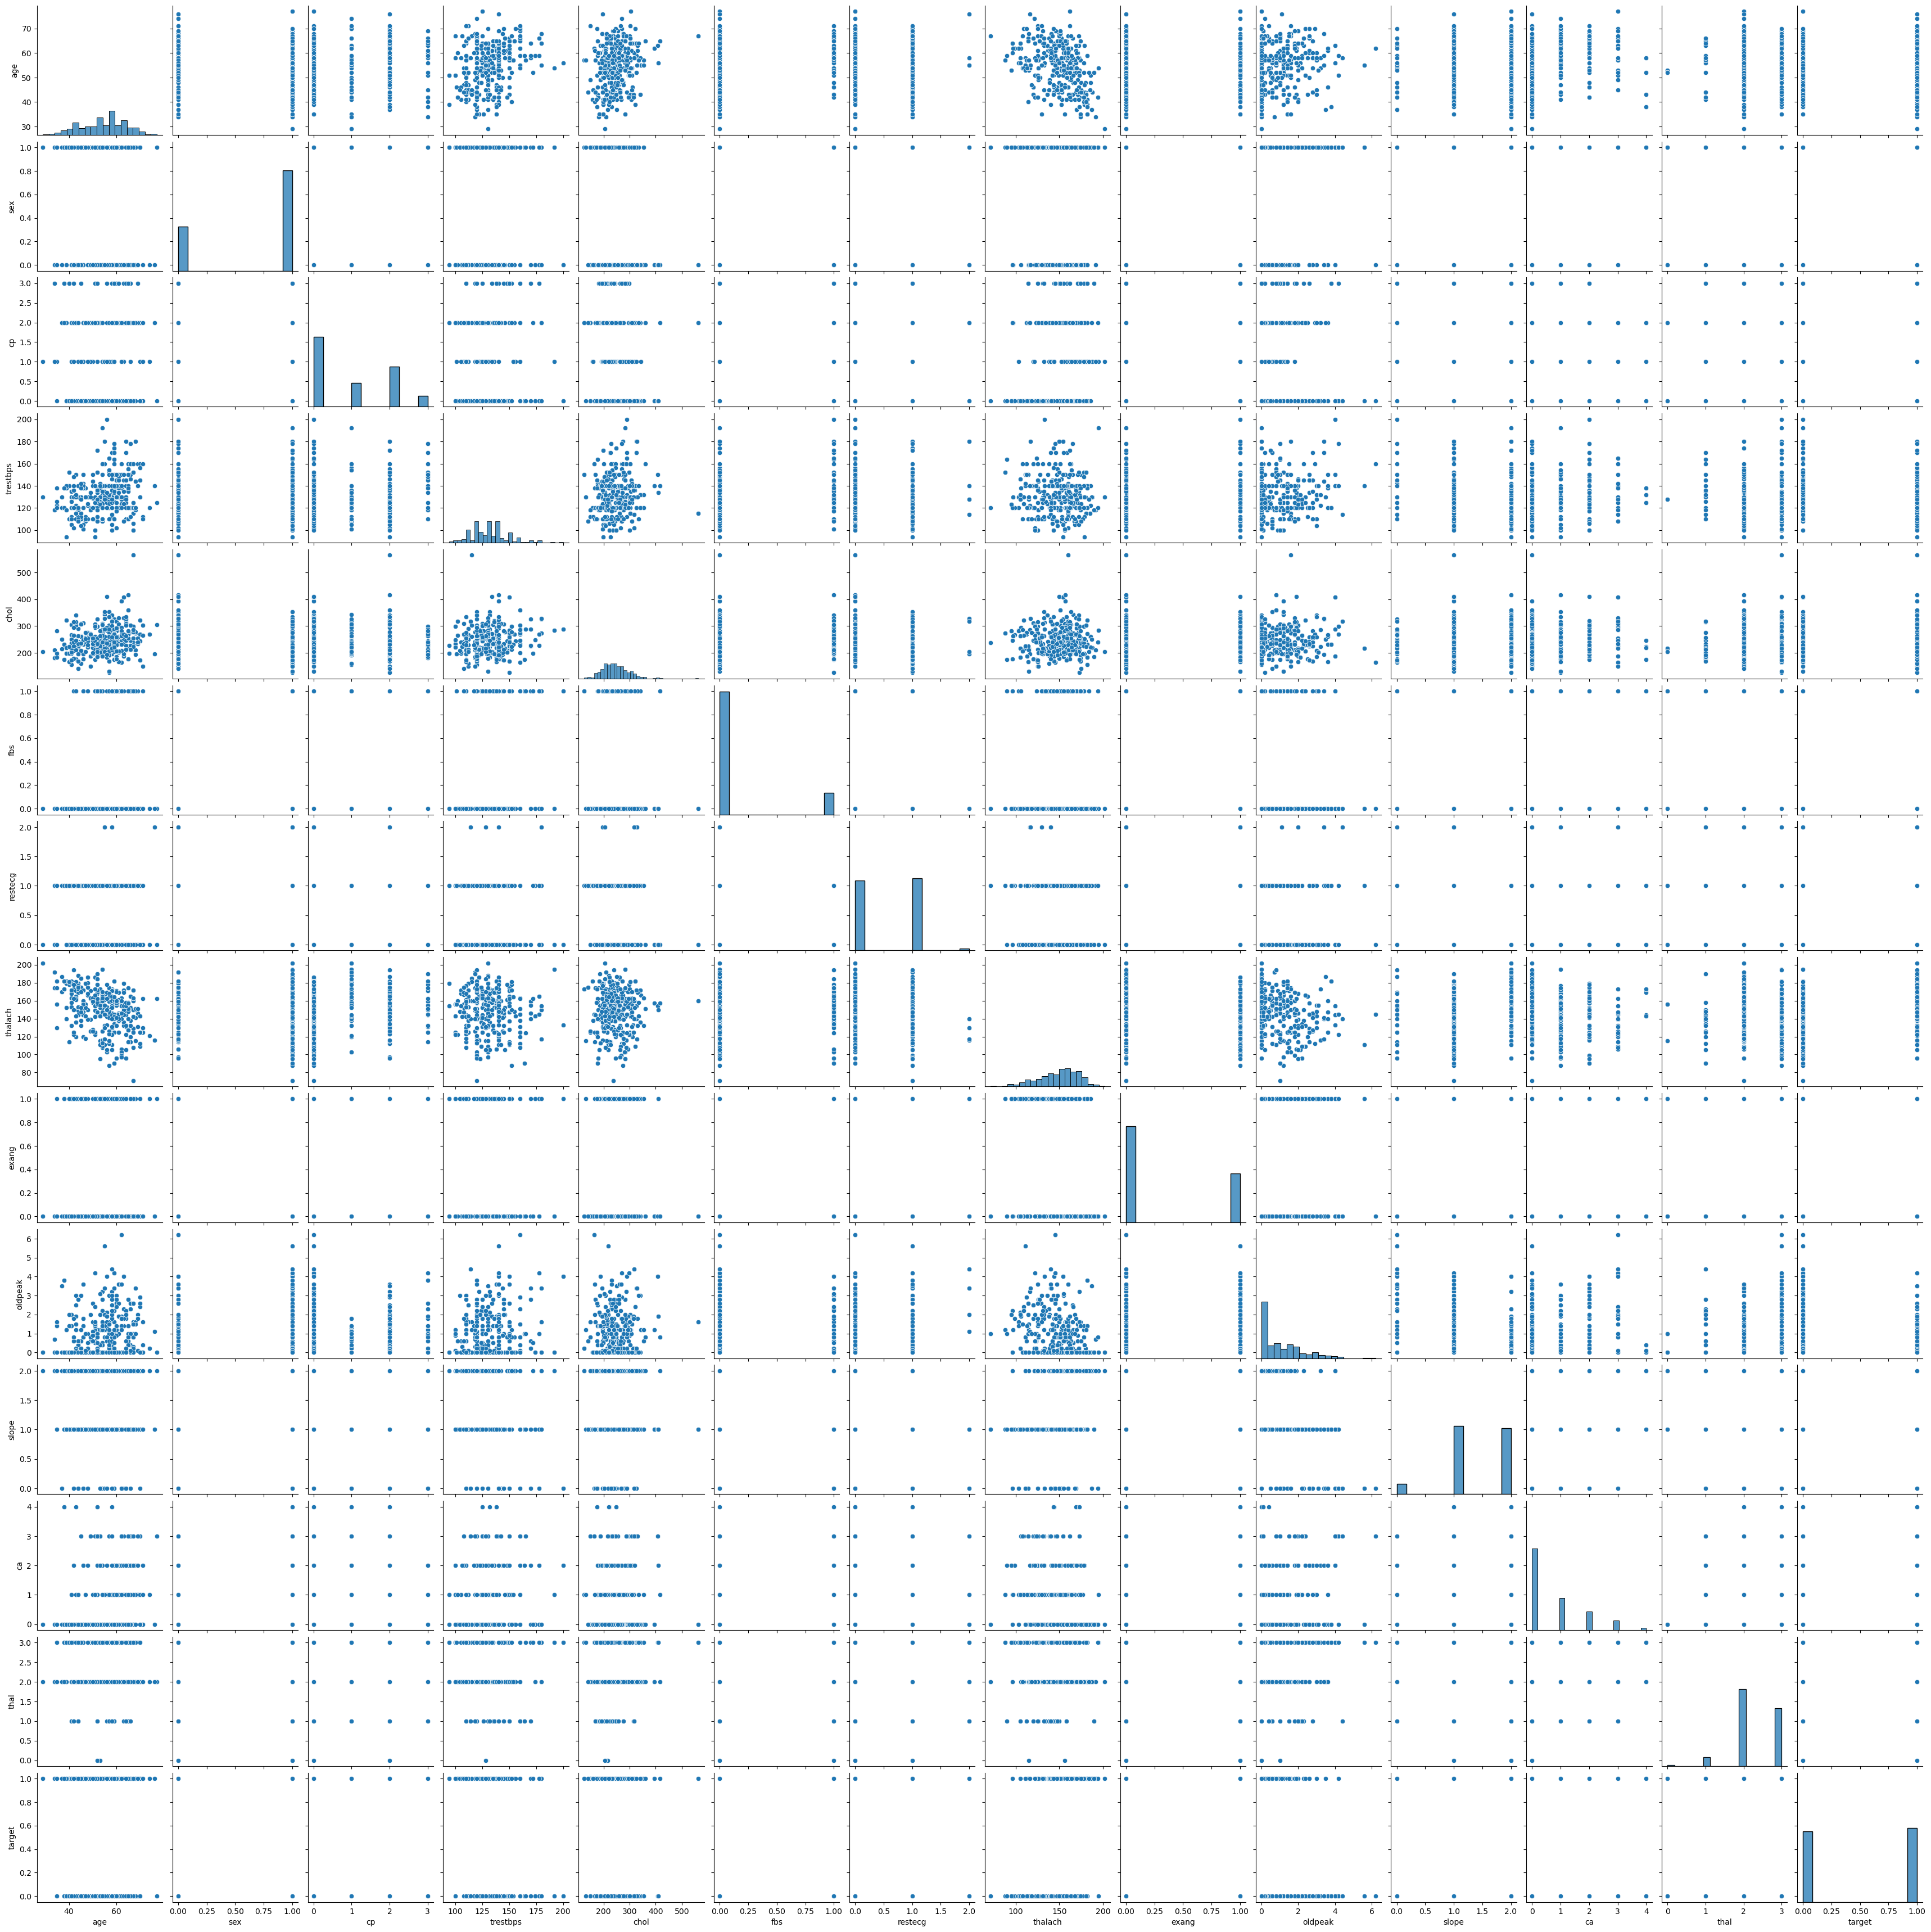

In [31]:
sns.pairplot(df)

In [32]:
# From the above visualizations there are some relations between:
# Age and Maximum heart rate
# Resting blood pressure and Age
# Age and Cholesterol level
# Maximum heart rate and Heart Disease
# Maximum heart rate and Slope
# ST Depression and Exercise induced angina
# ST Depression and Heart Disease
# Maximum heart rate and Age

In [33]:
px.scatter(df, x='age',
           y='thalach',
           trendline='ols',
           marginal_x='violin',
           color=df['target'].map(target),
           title='Age vs Maximum Heart Rate Achieved', 
           labels={'color':'Heart Disease','age': 'Age', 'thalach': 'Maximum Heart Rate'}).update_layout(title_x=0.5)

In [34]:
# Maximum heart rate of patients with heart disease tends to decrease with increasing age

In [35]:
px.scatter(df, x='age',
           y='trestbps',
           trendline='ols',
           marginal_x='violin',
           color=df['target'].map(target),
           title='Age vs Resting Blood Pressure', 
           labels={'color':'Heart Disease','age': 'Age', 'trestbps': 'Resting Blood Pressure'}).update_layout(title_x=0.5)

In [36]:
# The resting blood pressure of patients tends to increase with increasing age

In [37]:
px.scatter(df, x='age',
           y='chol',
           trendline='ols',
           marginal_x='violin',
           color=df['target'].map(target),
           title='Age vs Cholesterol Level',
           labels={'color':'Heart Disease','chol': 'Cholesterol Level', 'age': 'Age'}).update_layout(title_x=0.5)

In [38]:
# The Cholesterol level of patients with heart disease tends to increase with increasing age

In [39]:
px.box(df,
       y='thalach',
       title='Maximum Heart Rate Achieved by Patients',
       points='all',
       color=df['target'].map(target),
       labels={'color': 'Heart Disease', 'thalach': 'Maximum Heart Rate'}).update_layout(title_x=0.5)

In [40]:
# Patients with heart disease have higher maximum heart rate

In [41]:
px.box(df,
       y='thalach',
       title='Maximum Heart Rate by Slope',
       points='all',
       color=df['slope'].map(slope),
       labels={'color': 'Slope', 'thalach': 'Maximum heart rate'}).update_layout(title_x=0.5)

In [42]:
# Patients having downsloping peak exercise ST segment possess higher maximum heart rate

In [43]:
px.box(df,
       y='oldpeak',
       title='ST Depression by Exercise Induced Angina',
       points='all',
       color=df['exang'].map(exang),
       labels={'color': 'Exercise induced angina', 'oldpeak': 'ST Depression'}).update_layout(title_x=0.5)

In [44]:
# Patients with exercise induced angina have higher ST depression

In [45]:
px.box(df,
       y='oldpeak',
       title='ST Depression by Heart Disease',
       points='all',
       color=df['target'].map(target),
       labels={'color': 'Heart disease', 'oldpeak': 'ST Depression'}).update_layout(title_x=0.5)

In [46]:
# Patients with heart disease have lower ST depression

In [47]:
px.histogram(df,
             x='age',
             y='thalach',
             histfunc='avg',
             title='Maximum Heart Rate Achieved by Age Group',
             labels = {'thalach':'maximum heart rate', 'age':'Age Group'},
             marginal='violin',
             nbins=7).update_layout(title_x=0.5)

In [48]:
# Maximum heart rate tends to decrease with increasing age

###### Finding the most important attributes contributing to heart disease

In [49]:
X = df.drop('target',axis=1)
Y = df['target']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
model = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='friedman_mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9697651028536952

In [50]:
feature_importance_df = pd.DataFrame(x_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = model.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df

Feature  Importance
2         cp    0.207827
11        ca    0.158360
12      thal    0.107498
9    oldpeak    0.098737
4       chol    0.095635
0        age    0.074481
7    thalach    0.071262
3   trestbps    0.058615
8      exang    0.040795
1        sex    0.034563
10     slope    0.031308
6    restecg    0.015049
5        fbs    0.005872

In [51]:
px.bar(feature_importance_df, x='Feature', y='Importance', title='Importance of Health Attributes in Heart Diseases').update_layout(title_x=0.5)

In [52]:
# The type of chest pain, number of major vessels coloured in fluoroscopy and cholesterol level are some of the main factors

In [53]:
cp_target = df.pivot_table(index=['target','cp'], values='age', aggfunc='count').reset_index()

In [54]:
px.bar(cp_target,
       x=cp_target['cp'].map(cp),
       y='age',
       title='Presence of Heart Disease based on Chest Pain Type',
       labels={'color':'Heart Disease','x':'Chest Pain Type', 'age':'Number of Patients'},
       color=cp_target['target'].map({0:'Absent',1:'Present'})).update_layout(title_x=0.5)

In [55]:
# Most patients with non-anginal pain have heart disease followed by atypical angina

In [56]:
ca_target = df.pivot_table(index=['target','ca'], values='age', aggfunc='count').reset_index()

In [57]:
px.bar(ca_target,
       x=ca_target['ca'].map(ca),
       y='age',
       title='Presence of Heart Disease based on Vessels',
       labels={'color':'Heart Disease', 'x':'Number of Major Vessels Colored in Flouroscopy', 'age':'Number of Patients'},
       color=ca_target['target'].map({0:'Absent',1:'Present'})).update_layout(title_x=0.5)

In [58]:
# Most patients with heart disease dont show any vessels coloured under fluoroscopy

In [59]:
ca_target = df.pivot_table(index=['target','thal'], values='age', aggfunc='count').reset_index()

In [60]:
px.bar(ca_target,
       x=ca_target['thal'].map(thal),
       y='age',
       title='Presence of Heart Disease based on Type of Disorder',
       labels={'color':'Heart Disease', 'x':'Type of Disorder', 'age':'Number of Patients'},
       color=ca_target['target'].map({0:'Absent',1:'Present'})).update_layout(title_x=0.5)

In [61]:
# Most patients with reversable defects have heart disease